In [1]:
!python --version

Python 3.6.3 :: Anaconda, Inc.


## Estudo de caso 1 - Detecção de Fraude (Avaliação de Crédito)

#### Informações sobre o DATASET
Esse conjunto de dados obtido no repositório do WEKA, contêm clientes que solicitaram crédito em instituição financeira da Alemanha (ano desconhecido). Nela, contêm a classe da instância avaliada, onde os dois valores possíveis são "Bad" (cliente avaliado como fraude; crédito NÃO autorizado) e "Good" (cliente avaliado com crédito autorizado).
#### Definição do problema
Contruir um modelo preditivo que apoie na decisão de NEGAR ou AUTORIZAR a solicitação de crédito dos clientes avaliados. Objetivo: evitar eventos de fraude/minimizar inadimplência.
#### Link: http://weka.8497.n7.nabble.com/file/n23121/credit_fruad.arff
#### Obs.: arquivo convertido para .CSV (delimitador separador de campos: ",").

#### Descrição dos Atributos:

- Atributo 1: StatusContaCorrente_DM -> volume de dinheiro movimentado na conta em moeda local (dutch marc - DM)
- Atributo 2: DuracaoEmprestimoMeses -> prazo para pagamento do empréstimo
- Atributo 3: HistoricoCredito -> histórico de movimentações de crédito
- Atributo 4: Objetivo -> objetivo com o crédito solicitado
- Atributo 5: CreditoDisponivel_DM -> total de dinheiro disponível para crédito ao cliente em moeda local (dutch marc - DM)
- Atributo 6: ReservaDinheiroCliente_DM -> total de dinheiro alocado em poupança ou em títulos em moeda local (dutch marc - DM)
- Atributo 7: QtdMesesAtualEmprego -> se empregado, quanto tempo em meses está no atual emprego
- Atributo 8: TaxaJurosEmprestimo -> taxa de juros do empréstimo solicitado
- Atributo 9: GeneroEEstadoCivil -> orientação sexual do cliente, assim como seu estado civil
- Atributo 10: Fiador -> fiador do cliente em caso de inadimplência
- Atributo 11: QtdMesesAtualMoradia -> qtd. de meses morando na atual residência
- Atributo 12: Bens -> posses do cliente
- Atributo 13: QtdMesesContaCorrente -> qtd. de meses que tem conta corrente no banco
- Atributo 14: OutrosParcelamentos -> caso cliente tenha outros parcelamentos (em aberto ou quitados), informa a origem do crédito
- Atributo 15: Residencia -> informação se cliente tem residência prória, se é alugada ou de graça
- Atributo 16: QtdCreditosComBancoSolicitado -> qtd. de creditos (em aberto ou quitados) efetuados com o banco onde esta ocorrendo essa nova requisição de crédito
- Atributo 17: Ocupacao -> ocupação do cliente
- Atributo 18: QtdPessoasDependentes -> qtd. dependentes tem o cliente
- Atributo 19: Telefone -> telefone de contato do cliente
- Atributo 20: TrabalhadorEstrangeiro -> se cliente requisitante do crédito é um estrangeiro
- Atributo 21: Classe: "bad" or "good" payer -> classificação da instância observada

### 1. Importando Módulos

In [120]:
# biblioteca para manipulação de datas e tempo
import time as time
from datetime import timedelta

# bibliotecas de PRÉ-PROCESSAMENTO
from sklearn.preprocessing import MinMaxScaler # normaliza a escala dos dados das variáveis preditoras
from sklearn.preprocessing import StandardScaler # normaliza a distribuição dos dados gerando uma dist. Gaussiana (normal)
from sklearn.preprocessing import Normalizer # padroniza os dados em escala 1
from sklearn.preprocessing import Binarizer # binarização

# biblioteca para DIVISÃO DOS DADOS (treino, teste), AVALIAÇÃO DA PERFORMANCE, TUNNING DE PARÂMETROS
from sklearn import model_selection
from sklearn import cross_validation

# bibliotecas para AVALIAÇÃO DA QUALIDADE DAS PREVISÕES
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# biblioteca que habilita montar uma série de etapas. Exemplo: normalização de dados + geração do modelo preditivo
from sklearn.pipeline import Pipeline

# biblioteca que habilita o teste de valores no parâmetros dos algoritmos
from sklearn.grid_search import GridSearchCV

# bibliotecas de MACHINE LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# bibliotecas de otimização com MÉTODOS ENSEMBLE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# biblioteca de MANIPULAÇÃO DE DATAFRAMES
from pandas import read_csv
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pandas import set_option

# biblioteca de MANIPULAÇÃO DE ARRAYS E MATRIZES (N-DIMENSIONAIS)
import numpy as np

# biblioteca de VISUALIZAÇÃO DE DADOS
import matplotlib.pyplot as plt
import matplotlib.axes as ax_plt
import matplotlib.cm as cm #colormap
from matplotlib.patches import Polygon
%matplotlib inline

# biblioteca de ESTATÍSTICA onde a função gaussiana foi usada para obter a densidade de um array de dados
from scipy.stats import gaussian_kde

# biblioteca de ESTATÍSTICA gráfica usada para explorar os dados
import seaborn as sns

# desabilitando mensagens de warnings
from sklearn.exceptions import DataConversionWarning
import warnings

# bibliotecas para geração e carregamento, respectivamente, dos binários do modelo gerado
import pickle
import dill

def disable_DataConversionWarning():
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

def enable_All_Warning():
    warnings.simplefilter('always')

### 2. Carregamento dos Dados

In [860]:
url = "C:\\CreditCard.csv"
#url = '/home/daniellj/Desktop/CreditCard.csv'
colunas = ['StatusContaCorrente_DM', 'DuracaoEmprestimoMeses', 'HistoricoCredito', 'Objetivo', 'CreditoDisponivel_DM', 'ReservaDinheiroCliente_DM', 'QtdMesesAtualEmprego', 'TaxaJurosEmprestimo', 'GeneroEEstadoCivil', 'Fiador', 'QtdMesesAtualMoradia', 'Bens', 'QtdMesesContaCorrente', 'OutrosParcelamentos', 'Residencia', 'QtdCreditosComBancoSolicitado', 'Ocupacao', 'QtdPessoasDependentes', 'Telefone', 'TrabalhadorEstrangeiro', 'Classe']
dados = read_csv(filepath_or_buffer=url, names=colunas, delimiter=',')

### 3.1. Explorando os Dados

In [861]:
# Estatística Descritiva
print('-> Shape do dataframe [dados]:')
print('Linhas(observações):', dados.shape[0], '| Colunas(atributos):', dados.shape[1], '\n')
print('-> Tipagem dos atributos:')
print(dados.dtypes, '\n')

-> Shape do dataframe [dados]:
Linhas(observações): 1000 | Colunas(atributos): 21 

-> Tipagem dos atributos:
StatusContaCorrente_DM           object
DuracaoEmprestimoMeses            int64
HistoricoCredito                 object
Objetivo                         object
CreditoDisponivel_DM              int64
ReservaDinheiroCliente_DM        object
QtdMesesAtualEmprego             object
TaxaJurosEmprestimo               int64
GeneroEEstadoCivil               object
Fiador                           object
QtdMesesAtualMoradia              int64
Bens                             object
QtdMesesContaCorrente             int64
OutrosParcelamentos              object
Residencia                       object
QtdCreditosComBancoSolicitado     int64
Ocupacao                         object
QtdPessoasDependentes             int64
Telefone                         object
TrabalhadorEstrangeiro           object
Classe                           object
dtype: object 



In [862]:
print('-> Imprimindo as 20 primeiras linhas do dataframe [dados]:')
dados.head(5)

-> Imprimindo as 20 primeiras linhas do dataframe [dados]:


,StatusContaCorrente_DM,DuracaoEmprestimoMeses,HistoricoCredito,Objetivo,CreditoDisponivel_DM,ReservaDinheiroCliente_DM,QtdMesesAtualEmprego,TaxaJurosEmprestimo,GeneroEEstadoCivil,Fiador,...,Bens,QtdMesesContaCorrente,OutrosParcelamentos,Residencia,QtdCreditosComBancoSolicitado,Ocupacao,QtdPessoasDependentes,Telefone,TrabalhadorEstrangeiro,Classe
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


### 3.2. Verificando a distribuição da CLASSE

In [864]:
print('-> Distribuição das Classes:', '\n')

QtdObservacoes = dados.shape[0]
QtdValClasse = dados.Classe.unique().size
count = 0

print('Quantidade de observações:', QtdObservacoes)

while count < QtdValClasse:
    print(dados.Classe.unique()[count], ':', (dados.groupby('Classe').size())[count], '(', (((dados.groupby('Classe').size())[count]/ (QtdObservacoes)) * 100), '% )')
    count = count + 1

-> Distribuição das Classes: 

Quantidade de observações: 1000
good : 300 ( 30.0 % )
bad : 700 ( 70.0 % )


### 3.3. Adicionando CLASSE numérica no DATASET

In [863]:
dados['ClasseNumerica'] = np.where(dados['Classe']=='good', 1, 0)
dados.head(5)

,StatusContaCorrente_DM,DuracaoEmprestimoMeses,HistoricoCredito,Objetivo,CreditoDisponivel_DM,ReservaDinheiroCliente_DM,QtdMesesAtualEmprego,TaxaJurosEmprestimo,GeneroEEstadoCivil,Fiador,...,QtdMesesContaCorrente,OutrosParcelamentos,Residencia,QtdCreditosComBancoSolicitado,Ocupacao,QtdPessoasDependentes,Telefone,TrabalhadorEstrangeiro,Classe,ClasseNumerica
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,67,none,own,2,skilled,1,yes,yes,good,1
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,22,none,own,1,skilled,1,none,yes,bad,0
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,49,none,own,1,'unskilled resident',2,none,yes,good,1
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,45,none,'for free',1,skilled,2,none,yes,good,1
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,53,none,'for free',2,skilled,2,none,yes,bad,0


### 3.4. Avaliando se os dados das variáveis estão com uma DISTRIBUIÇÃO NORMAL GAUSSIANA

In [15]:
dados.skew(axis=0) # axis : {linha (0), coluna (1)}

DuracaoEmprestimoMeses           1.094184
CreditoDisponivel_DM             1.949628
TaxaJurosEmprestimo             -0.531348
QtdMesesAtualMoradia            -0.272570
QtdMesesContaCorrente            1.020739
QtdCreditosComBancoSolicitado    1.272576
QtdPessoasDependentes            1.909445
ClasseNumerica                  -0.874183
dtype: float64

### 3.5. Sumarizando os Dados

In [16]:
# Definindo precisão de 3 casas decimais para o describe dos dados
set_option('precision', 2)
print('-> Sumarizando os dados do dataframe [dados]:')
dados.describe()

-> Sumarizando os dados do dataframe [dados]:


,DuracaoEmprestimoMeses,CreditoDisponivel_DM,TaxaJurosEmprestimo,QtdMesesAtualMoradia,QtdMesesContaCorrente,QtdCreditosComBancoSolicitado,QtdPessoasDependentes,ClasseNumerica
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,20.90,3271.26,2.97,2.85,35.55,1.41,1.16,0.70
std,12.06,2822.74,1.12,1.10,11.38,0.58,0.36,0.46
min,4.00,250.00,1.00,1.00,19.00,1.00,1.00,0.00
25%,12.00,1365.50,2.00,2.00,27.00,1.00,1.00,0.00
50%,18.00,2319.50,3.00,3.00,33.00,1.00,1.00,1.00
75%,24.00,3972.25,4.00,4.00,42.00,2.00,1.00,1.00
max,72.00,18424.00,4.00,4.00,75.00,4.00,2.00,1.00


### 4. Visualização de Dados

#### 4.1. Histogram
Verificar a FREQUÊNCIA da distribuição dos dados (numéricos).

PLOT com MATPLOTLIB...


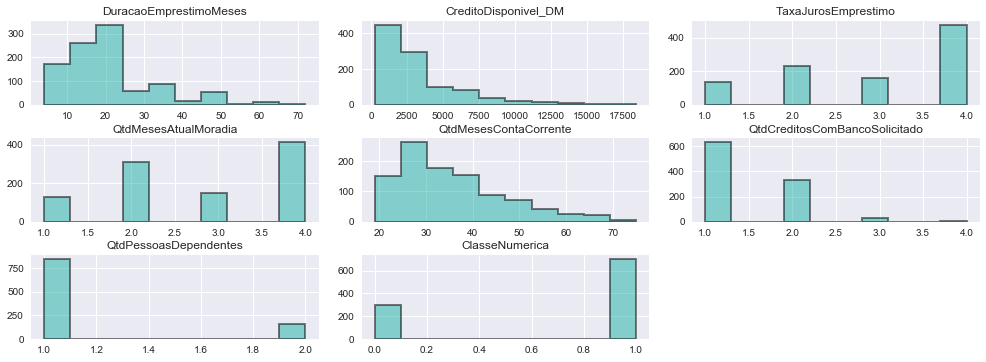



PLOT com PANDAS...


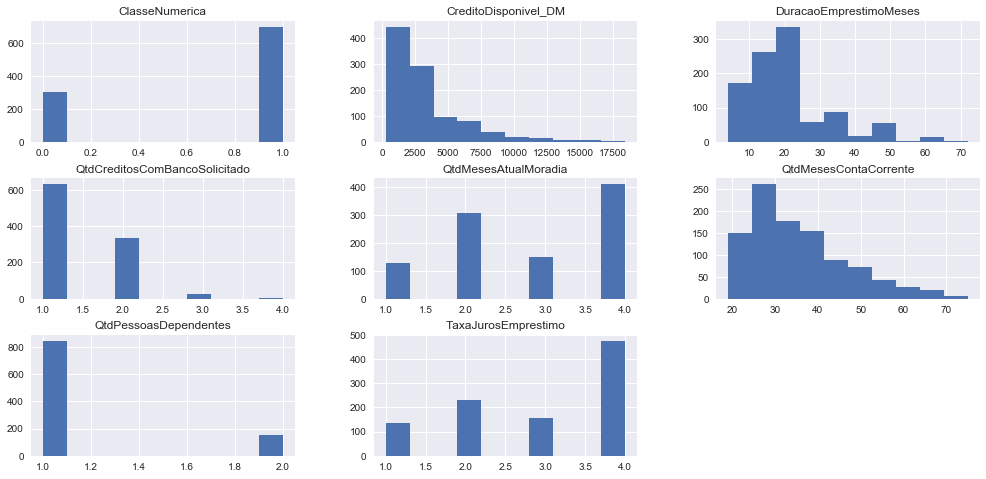

In [935]:
print('PLOT com MATPLOTLIB...')
#capturando as colunas numéricas
ColunaNumericas = (dados._get_numeric_data()).columns.tolist()

qtsubdplots = len(ColunaNumericas)
qtdplotcolumns = 3

# Verificando quantidade de linhas NECESSÁRIAS
qtdplotlines = qtsubdplots // qtdplotcolumns
qtdplotlines = qtdplotlines + (qtsubdplots % qtdplotcolumns)

fig = plt.figure(1, figsize=(17,8)) # criando a figura com um único PLOT

subplot_position = range(1, qtsubdplots + 1) # o valor do índice do eixe inicia em 1

for index in range(0, qtsubdplots):
    fig.add_subplot(I=qtdplotlines, J=qtdplotcolumns, K=subplot_position[index], sharex=False, sharey=False, grid=True) #indicando o posicionamento do subpplot
    plt.subplot(qtdplotlines, qtdplotcolumns, subplot_position[index], title=ColunaNumericas[index])
    plt.hist(dados[ColunaNumericas[index]], rwidth=0.85, histtype= "stepfilled", color="lightseagreen", alpha= 0.5, edgecolor='k', linewidth=2)
plt.subplots_adjust(wspace=0.15, hspace=0.4)
plt.show()

#PLOT COM O PANDAS:
print('\n')
print('PLOT com PANDAS...')
dados.hist(sharex=False, sharey=False, figsize=(17,8), grid=True)
plt.show()

#### 4.2. Density
Verificar a DENSIDADE da distribuição dos dados.

PLOT com MATPLOTLIB...


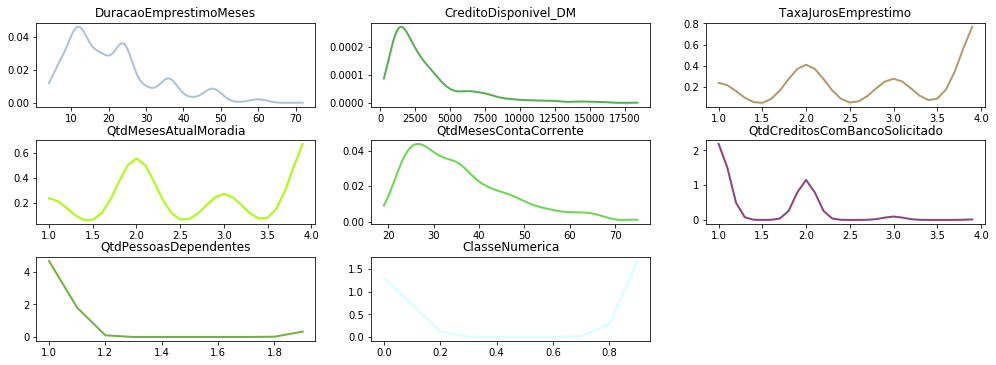



PLOT com PANDAS...


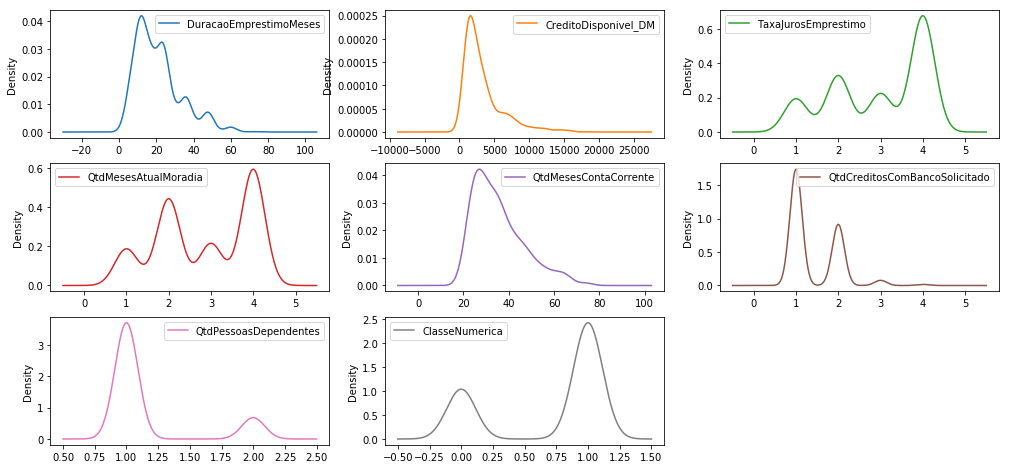

In [4]:
print('PLOT com MATPLOTLIB...')
#capturando as colunas numéricas
ColunaNumericas = (dados._get_numeric_data()).columns.tolist()

qtsubdplots = len(ColunaNumericas)
qtdplotcolumns = 3

# Verificando quantidade de linhas NECESSÁRIAS
qtdplotlines = qtsubdplots // qtdplotcolumns
qtdplotlines = qtdplotlines + (qtsubdplots % qtdplotcolumns)

fig = plt.figure(1, figsize=(17,8)) # criando a figura com um único PLOT

subplot_position = range(1, qtsubdplots + 1) # o valor do índice do eixe inicia em 1
color_list = ['#acc2d9', '#56ae57', '#b2996e', '#a8ff04', '#69d84f', '#894585', '#70b23f', '#d4ffff', '#65ab7c', '#952e8f', '#fcfc81', '#a5a391', '#388004', '#4c9085', '#5e9b8a', '#efb435', '#d99b82', '#0a5f38', '#0c06f7', '#61de2a']

def densityplot(x_data, density_est, x_label, title, axe_position, color):
    fig.add_subplot(I=qtdplotlines, J=qtdplotcolumns, K=subplot_position[axe_position], sharex=False, sharey=False) #indicando o posicionamento do subpplot
    plt.subplot(qtdplotlines, qtdplotcolumns, subplot_position[axe_position], title=title)
    plt.x_label=x_label
    plt.y_label='density'
    plt.plot(x_data, density_est(x_data), color=color, linewidth=2)

for index in range(0, qtsubdplots):
    #fig.add_subplot(I=qtdplotlines, J=qtdplotcolumns, K=subplot_position[index], sharex=False, sharey=False, grid=True) #indicando o posicionamento do subpplot
    #plt.subplot(qtdplotlines, qtdplotcolumns, subplot_position[index], title=ColunaNumericas[index])

    #PREPARAÇÃO DOS DADOS PARA PLOT
    data = dados[ColunaNumericas[index]]
    density_est = gaussian_kde(data) #usando função gaussiana para calcul os valores da densidade dos dados
    density_est.covariance_factor = lambda : 0.2
    density_est._compute_covariance()
    x_data = np.arange(min(data), max(data), 0.1) #Criando um range Numpy para comportar os dados do eixo "X"
    
    densityplot(x_data = x_data
                ,density_est = density_est
                ,x_label = ColunaNumericas[index]
                ,title = ColunaNumericas[index]
                ,axe_position = index
                ,color = color_list[index]
               )

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

#PLOT COM O PANDAS:
print('\n')
print('PLOT com PANDAS...')
dados.plot(kind = 'density', subplots = True, figsize=(17,8), layout = (3,3), sharex=False, sharey=False, legend=True)
plt.show()

#### 4.3. Correlation Matrix
Verificar a MATRIZ DE CORRELAÇÃO dos dados.

##### 4.3.1. Correlation Matrix Table

In [939]:
dados.corr()

,DuracaoEmprestimoMeses,CreditoDisponivel_DM,TaxaJurosEmprestimo,QtdMesesAtualMoradia,QtdMesesContaCorrente,QtdCreditosComBancoSolicitado,QtdPessoasDependentes,ClasseNumerica
DuracaoEmprestimoMeses,1.00,0.62,0.07,3.41e-02,-0.04,-0.01,-2.38e-02,-2.15e-01
CreditoDisponivel_DM,0.62,1.00,-0.27,2.89e-02,0.03,0.02,1.71e-02,-1.55e-01
TaxaJurosEmprestimo,0.07,-0.27,1.00,4.93e-02,0.06,0.02,-7.12e-02,-7.24e-02
QtdMesesAtualMoradia,0.03,0.03,0.05,1.00e+00,0.27,0.09,4.26e-02,-2.97e-03
QtdMesesContaCorrente,-0.04,0.03,0.06,2.66e-01,1.00,0.15,1.18e-01,9.11e-02
QtdCreditosComBancoSolicitado,-0.01,0.02,0.02,8.96e-02,0.15,1.00,1.10e-01,4.57e-02
QtdPessoasDependentes,-0.02,0.02,-0.07,4.26e-02,0.12,0.11,1.00e+00,3.01e-03
ClasseNumerica,-0.21,-0.15,-0.07,-2.97e-03,0.09,0.05,3.01e-03,1.00e+00


##### 4.3.2. Correlation Matrix Heatmap

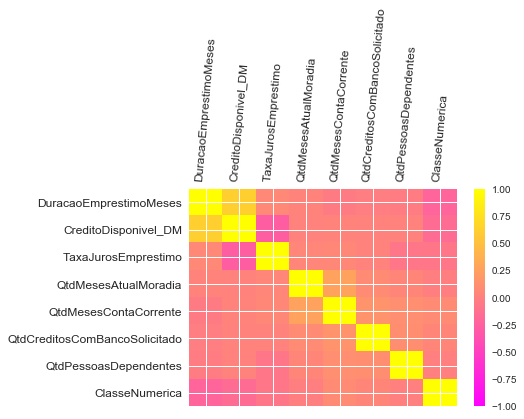

In [940]:
#variável values_corr aramzena a matriz de correlação tabular
ColunaNumericas = (dados._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtdTotalElementos = len(ColunaNumericas)

values_corr = dados.corr() #coloca a matrix de correlação tabular em um objeto "values_corr"

fig = plt.figure() #montando o gráfico
ax = fig.add_subplot(1,1,1) #divisão da figura: qtd. linhas, qtd. colunas, posição
correlation_matrix = ax.matshow(values_corr
                                ,vmin = -1
                                ,vmax = 1
                                ,interpolation = 'none'
                                ,cmap = 'spring' #'hot_r', 'pink_r', 'spring', 'spring_r'
                                ,aspect='auto'
                                #,alpha = 0.75
                                ,origin = 'upper'
                               ) #matshow -> plota um array ou matriz como uma imagem

fig.colorbar(correlation_matrix) #barra de cores que indica a "temperatura"

ticks = np.arange(0, QtdTotalElementos, 1) #range da escala de valores. Sabendo que os valores de Corr ficam entre -1 e 1.
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(labels=ColunaNumericas, rotation=85, fontsize=12)
ax.set_yticklabels(labels=ColunaNumericas, fontsize=12)
plt.show()

#### 4.4. Scatterplot relacionando ALGUMAS variáveis do dataset com a classe (em pares)

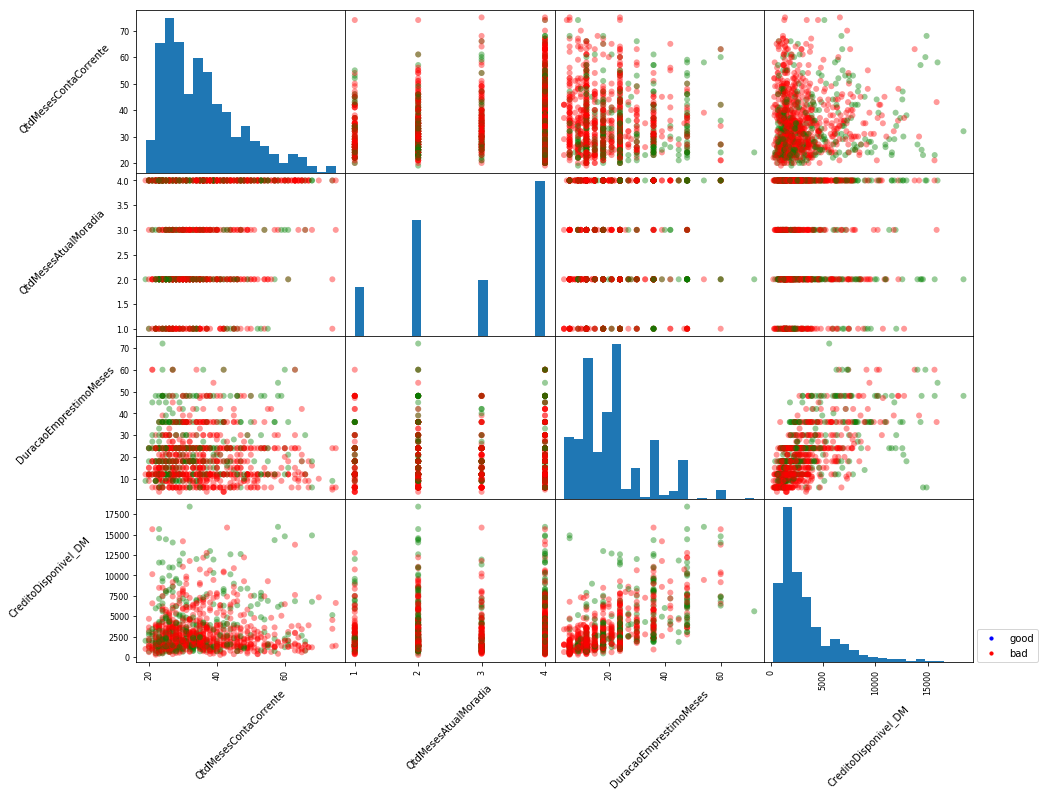

In [159]:
#criando novo dataframe
colunas = ['QtdMesesContaCorrente', 'QtdMesesAtualMoradia', 'DuracaoEmprestimoMeses', 'CreditoDisponivel_DM']
dataframe = dados[colunas]

colors = ['green','red'] #green = 'good' | red = 'bad'

axs = scatter_matrix(frame=dataframe, figsize=(15, 12), alpha=0.4, hist_kwds={'bins':20}, diagonal='hist',
                     range_padding=0.10, marker='o',
                     color=dados.ClasseNumerica.apply(lambda x:colors[x])
                    )

ColunaNumericas = (dataframe._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
qtd_columns = len(colunas)

for x in range(qtd_columns):
    for y in range(qtd_columns):
        ax = axs[x, y] # to get the axis of subplots
        ax.xaxis.label.set_rotation(45) # to make x axis name vertical
        ax.yaxis.label.set_rotation(45) # to make y axis name horizontal
        ax.xaxis.labelpad = 8 # to make sure x axis names are outside the plot area
        ax.yaxis.labelpad = 50 # to make sure y axis names are outside the plot area
        #ax.legend(label='asd')

handles = [plt.plot([],[], color=plt.cm.brg(i/2.), ls="", marker="o", markersize=np.sqrt(10))[0] for i in range(2)]
labels=["good", "bad"]

plt.legend(handles=handles, labels=labels, loc=(1.02,0))
plt.show()

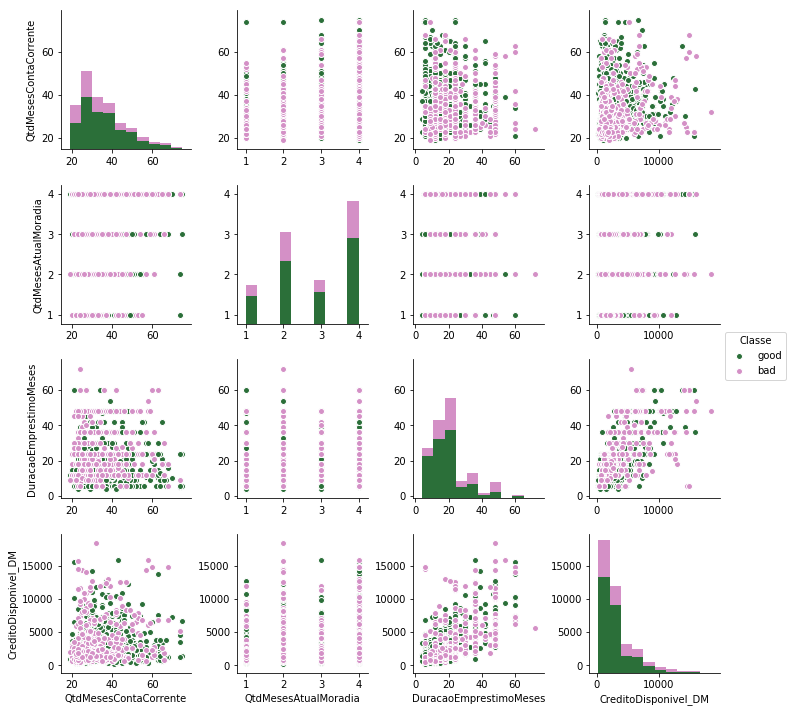

In [172]:
colunas = ['QtdMesesContaCorrente', 'QtdMesesAtualMoradia', 'DuracaoEmprestimoMeses', 'CreditoDisponivel_DM']
dataframe = dados[colunas] #coloca todos os dados de colunas numéricas em um dataframe
dataframe = dataframe.assign(Classe=dados['Classe']) #assign=add nova coluna com dados em um dataframe jé existente

sns.pairplot(data=dataframe, hue="Classe", kind='scatter', palette="cubehelix") # 'cubehelix', Set2', 'Paired'

### 5. Preparação dos Dados

#### 5.1. Separando variáveis INDEPENDETES (preditoras) de DEPENDENTES (previsoras)

In [865]:
ColunaNumericas = (dados._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtColunasNumericas = len(ColunaNumericas)-1 #contando a quantidade de colunas (-1 pois o índice começa em ZERO)

# Criando datasets para variáveis preditoras e previsoras (técnica de SLICE)
preditoras = (dados[ColunaNumericas]).values[:,0:QtColunasNumericas] # index QtColunasNumericas é excludente no slice!
alvo = (dados[ColunaNumericas]).values[:,QtColunasNumericas] # QtColunasNumericas = index da última coluna = CLASSE

print('Tipo do objeto "preditoras" (variáveis preditoras):', type(preditoras))
print('Tipo do objeto "alvo" (variável previsão):', type(alvo))
print('Dimensão do objeto "preditoras" (variáveis preditoras):', preditoras.shape)
print('Dimensão do objeto "alvo" (variável previsão):', alvo.shape)

Tipo do objeto "preditoras" (variáveis preditoras): <class 'numpy.ndarray'>
Tipo do objeto "alvo" (variável previsão): <class 'numpy.ndarray'>
Dimensão do objeto "preditoras" (variáveis preditoras): (1000, 7)
Dimensão do objeto "alvo" (variável previsão): (1000,)


#### 5.2. Divisão do dados em TREINO e TESTE

In [867]:
#Definição do tamanho das amostras
test_size = 0.20 # % destinado para TESTE

#Garante que os resultados podem ser reproduzidos
#Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 #"semente" = if int, is the seed used by the random number generator.

# Conjuntos de dados de treino e de teste
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = model_selection.train_test_split(
                                                                     preditoras
                                                                    ,alvo
                                                                    ,test_size = test_size
                                                                    ,random_state = seed #semente
                                                                    )

### 6. Avaliação do(s) Algoritmo(s)

#### 6.1. Executando com diversos algoritmos para ver qual o de melhor acurácia

In [870]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Utilizando como métrica a ACURÁCIA. Quanto > o valor, melhor.
modelos = []
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('SVC', SVC()))
resultados = []
nomes = []

modelos_nome = [] #irá armazenar o NOME do modelo preditivo usado
mensagens = [] #irá armazenar mensagens

#Definição do tamanho das amostras que irão ser usadas nas predições
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
#n_instances = len(preditoras_treino) #quantidade de instâncias que irão ser usadas nas predições
seed = 7 #"semente" = if int, is the seed used by the random number generator.

for nome, modelo in modelos:
    # Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
    k_folds = model_selection.KFold(n_splits = n_folds, random_state = seed)

    #Criação do modelo
    result_saida = model_selection.cross_val_score(modelo #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                                    ,preditoras_treino # x = variável com os valores preditores
                                                    ,alvo_treino # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                                    ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                                    #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                                    ,scoring = 'accuracy'
                                                    #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                                    )

    #Colocando o NOME do modelo medido em uma lista.
    modelos_nome.append(nome)
    #Colocando o resultado da acurácia do modelo em uma lista. Scoring selecionado: "accuracy".
    resultados.append(result_saida * 100)
    #Saída para mensagem final
    mensagens.append('MODELO: %s      \n\nMÉDIA: %.2f%%\nDESVIO PADRDÃO: %.2f%%' % (modelo, (result_saida.mean()*100), (result_saida.std()*100)))

#### 6.2. Plotando um Bloxpot com os resultados
Exemplo de BOXPLOT usando: https://matplotlib.org/examples/pylab_examples/boxplot_demo2.html

----------------> Acurácia <---------------- 

Modelos preditivos selecionados: ['LogisticRegression', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'GaussianNB', 'SVC'] 

Técnica para divisão dos dados: Cross Validation com Fold"s (Dobras).
Qtd. FOLD"s: 15 

---> AVALIAÇÃO GRÁFICA <--- 



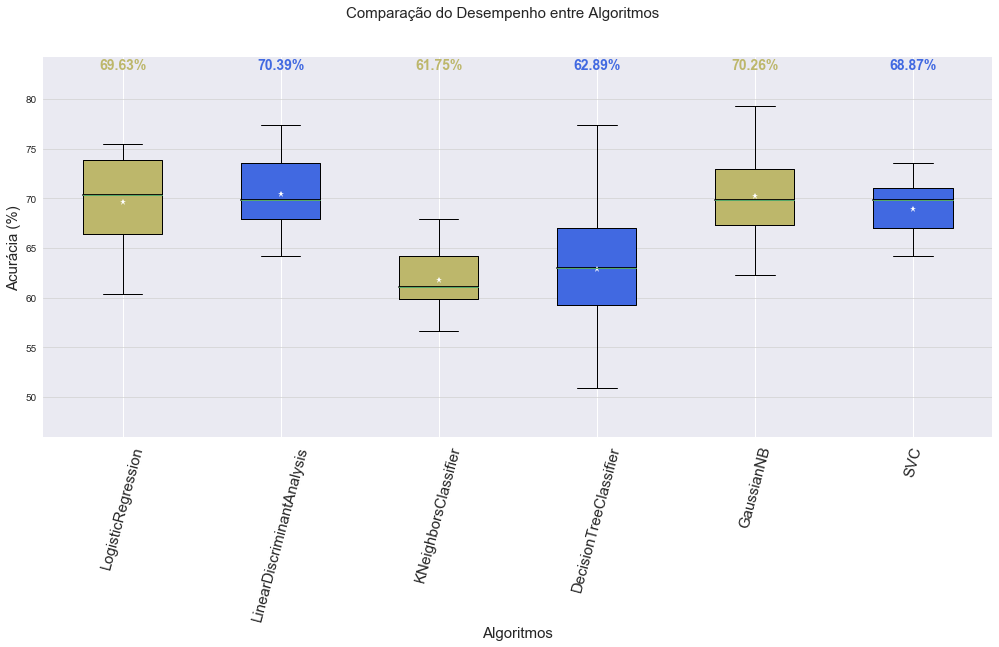

---> AVALIAÇÃO DESCRITIVA <---
-------------------------------------------------------------------- 

MODELO: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)      

MÉDIA: 69.63%
DESVIO PADRDÃO: 4.82%
-------------------------------------------------------------------- 

MODELO: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)      

MÉDIA: 70.39%
DESVIO PADRDÃO: 3.73%
-------------------------------------------------------------------- 

MODELO: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')      

MÉDIA: 61.75%
DESVIO PADRDÃO: 2.88%
-----------------------------------

In [871]:
#Imprimindo a média e o desvio padrão
print('----------------> Acurácia <----------------', '\n')
print('Modelos preditivos selecionados:', modelos_nome, '\n')
print('Técnica para divisão dos dados: Cross Validation com Fold"s (Dobras).')
print('Qtd. FOLD"s:', n_folds, '\n')
print('---> AVALIAÇÃO GRÁFICA <---', '\n')

#Gerando gráfico para comparativo da acurácia dos modelos
fig = plt.figure(figsize=(17, 7))
fig.suptitle('Comparação do Desempenho entre Algoritmos', fontsize=15)

# add eixo na posição 1 do da figura de 1 linha e 1 coluna
ax = fig.add_subplot(111)

# setando labels para eixo X e Y
ax.set_xlabel('Algoritmos', fontsize=15)
ax.set_ylabel('Acurácia (%)', fontsize=15)

# inserindo grid na horizonal
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.75)

# estilo "boxplot" usando os valores da variável "resultados"
boxplot = plt.boxplot(resultados)

########## START - Dinamizando as cores dos boxplot's + inserindo text nas box com o valor da média ##########
plt.setp(boxplot['boxes'], color='black')

# Para cada PAR de caixas "boxplot", exibe com a cor desejada
boxColors = ['darkkhaki', 'royalblue']
numBoxes = (len(modelos_nome))
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = boxplot['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between Dark Khaki and Royal Blue
    k = i % 2
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = boxplot['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    plt.plot([np.average(med.get_xdata())], [np.average(resultados[i])], color='w', marker='*', markeredgecolor='k')

#buscando o menor e o maior valor entre todos os valores das médias de cada FOLD
medias = []
quantidade_medias = len(modelos_nome)

for i in range(quantidade_medias):
    itens_array = len(resultados)
    lista = (resultados[i])
    for it in range(len(lista)):
        medias.append(lista[it])
array_final = np.array(medias)
min_value = array_final.min()
max_value = array_final.max()

#criando um array com os valores das médias dos modelos
array_medias = []
quant_modelos = len(resultados)

for i in range(quant_modelos):
    valores_dobras = [] #zera quando muda de array
    lista = (resultados[i])
    for index in range(len(lista)):
        valores_dobras.append(lista[index])
    temp = (np.array(valores_dobras))
    array_medias.append(float(temp.sum()/n_folds))
#array_medias[i]

# Set the axes ranges and axes labels
ax.set_xlim(0.5, numBoxes + 0.5)
top = max_value + 5
bottom = min_value - 5
ax.set_ylim(bottom, top)

pos = np.arange(numBoxes) + 1
upperLabels = [str(np.round(s,2)) for s in array_medias] # onde irá ficar as Text Label's, convertidas para STRING
weights = ['bold', 'semibold']
for tick, label in zip(range(numBoxes), ax.get_xticklabels()):
    k = round(tick % 2, 2)
    ax.text(pos[tick], top - (top * 0.015), upperLabels[tick] + '%', horizontalalignment='center', size='x-small', fontsize=14,
                                                                    weight=weights[k], color=boxColors[k])
########## END - Dinamizando as cores dos boxplot's + inserindo text nas box com o valor da média ##########

# inserindo os "ticks" de cada "boxplot", com rotação
xtickNames = plt.setp(ax, xticklabels=modelos_nome)
plt.setp(xtickNames, rotation=75, fontsize=15)

#exibindo o gráfico
plt.show()

#Forma descritiva
qtd_mensagens = len(mensagens)
iterador = 0

print('---> AVALIAÇÃO DESCRITIVA <---')
while qtd_mensagens > iterador:
    print('--------------------------------------------------------------------', '\n')
    print(mensagens[iterador])
    iterador = iterador + 1
print('--------------------------------------------------------------------')

### 7. PIPELINE

#### 7.1. Ajustando:
- Gerando os modelo PREDITIVOS

In [872]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Criando modelo de Machine Leanring a partir de cada algoritmo
# Utilizando como métrica a ACURÁCIA. Quanto > o valor, melhor.

# montandoo pipeline de operações: ajuste de escala + padronização do conj. de dados (dist. Gaussiana) + modelo preditivo
pipelines = []
pipelines.append(('LogisticRegression', Pipeline([('LogisticRegression', LogisticRegression())])))
pipelines.append(('LinearDiscriminantAnalysis', Pipeline([('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())])))
pipelines.append(('KNeighborsClassifier', Pipeline([('KNeighborsClassifier', KNeighborsClassifier())])))
pipelines.append(('DecisionTreeClassifier', Pipeline([('DecisionTreeClassifier', DecisionTreeClassifier())])))
pipelines.append(('GaussianNB', Pipeline([('GaussianNB', GaussianNB())])))
pipelines.append(('SVC', Pipeline([('SVC', SVC())])))

# lista para armazenar o nome dos algoritmos
algoritmos = []

# listas para armazenar o resultado dos modelos SEM PRÉ-PROCESSAMENTO
acuracia_COM_VALID_CRUZADA = []
desviopadrao_COM_VALID_CRUZADA = []

# listas para armazenar o resultado dos modelos COM PRÉ-PROCESSAMENTO
acuracia_SEM_VALID_CRUZADA = []
desviopadrao_SEM_VALID_CRUZADA = []

# lista de colunas para uso posterior no Pandas
colunas = ['algorithm', '% accuracy (WITH cross-validation)', '% std (WITH cross-validation)', '% accuracy (WITHOUT cross-validation)', '% std (WITHOUT cross-validation)']

n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
seed = 7 #"semente" = if int, is the seed used by the random number generator.

# Cenário 1 - Medindo acurárica dos modelos COM_VALID_CRUZADA
# Percorrendo cada um dos modelos
for algoritmo, modelo in pipelines:
    # Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
    k_folds = model_selection.KFold(n_splits = n_folds, random_state = seed)

    #Criação do modelo
    result_saida = model_selection.cross_val_score(modelo #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                                  ,preditoras_treino # x = variável com os valores preditores
                                                  ,alvo_treino # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                                  ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                                  #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                                  ,scoring = 'accuracy'
                                                  #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                                  )

    acuracia_COM_VALID_CRUZADA.append(float("{0:.2f}".format(result_saida.mean() * 100)))
    desviopadrao_COM_VALID_CRUZADA.append(float("{0:.2f}".format(result_saida.std() * 100)))
    algoritmos.append(algoritmo)

# Cenário 2 - Medindo acurárica dos modelos SEM_VALID_CRUZADA
    modelo.fit(preditoras_treino, alvo_treino) # treinando o(s) modelos com os dados de TREINO das PREDITORAS e ALVO
    alvo_predito = modelo.predict(preditoras_teste) # gerando a predição com os dados de TESTE das PREDITORAS

    # na avaliação do score abaixo, cruza os valores do ALVO de TESTE "VERDADEIRO" X ALVO dos dados que foram PREDITOS
                                                                                   # com as PREDITORAS de TREINO
    acuracia = accuracy_score(y_true=alvo_teste, y_pred=alvo_predito)
    
    acuracia_SEM_VALID_CRUZADA.append(float("{0:.2f}".format(acuracia.mean() * 100)))
    desviopadrao_SEM_VALID_CRUZADA.append(float("{0:.2f}".format(acuracia.std() * 100)))

# Criando um DataFrame para comparativo de ambos os processamentos (SEM e COM Pré-Processamento...)
array_comp = np.column_stack([algoritmos,
                              acuracia_COM_VALID_CRUZADA,
                              desviopadrao_COM_VALID_CRUZADA,
                              acuracia_SEM_VALID_CRUZADA,
                              desviopadrao_SEM_VALID_CRUZADA])

datafram_comp = DataFrame(data=array_comp, columns=[colunas])

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()

#### 7.1.1. Informativo sobre a acurácia dos modelos (COM e SEM validação-cruzada)

In [873]:
# imprimindo o DataFrame criado para averiguar as diferenças
colunas_categoricas = ['algorithm']
colunas_numericas = ['% accuracy (WITH cross-validation)', '% std (WITH cross-validation)', '% accuracy (WITHOUT cross-validation)', '% std (WITHOUT cross-validation)']

# ajuste de tipagem de dados das colunas categóricas no DataFrame
datafram_comp[colunas_categoricas] = datafram_comp[colunas_categoricas].astype(dtype='str')

# ajuste de tipagem de dados das colunas numéricas no DataFrame
datafram_comp[colunas_numericas] = datafram_comp[colunas_numericas].astype(dtype='float64')

print('---> Tipagem de dados do DataFrame criado:', '\n')
print(datafram_comp.dtypes)

# Reordenando os dados no DataFrame
#datafram_comp.sort_values(axis='columns', by='% accuracy (WITH pre-process)', ascending=False)
datafram_comp.sort_values(axis='index', by=['% accuracy (WITH cross-validation)'], ascending=False)

---> Tipagem de dados do DataFrame criado: 

algorithm                                 object
% accuracy (WITH cross-validation)       float64
% std (WITH cross-validation)            float64
% accuracy (WITHOUT cross-validation)    float64
% std (WITHOUT cross-validation)         float64
dtype: object


,algorithm,% accuracy (WITH cross-validation),% std (WITH cross-validation),% accuracy (WITHOUT cross-validation),% std (WITHOUT cross-validation)
1,LinearDiscriminantAnalysis,70.39,3.73,75.0,0.0
4,GaussianNB,70.26,4.71,73.5,0.0
0,LogisticRegression,69.63,4.82,74.5,0.0
5,SVC,68.87,4.68,74.5,0.0
3,DecisionTreeClassifier,62.76,6.80,70.5,0.0
2,KNeighborsClassifier,61.75,2.88,68.0,0.0


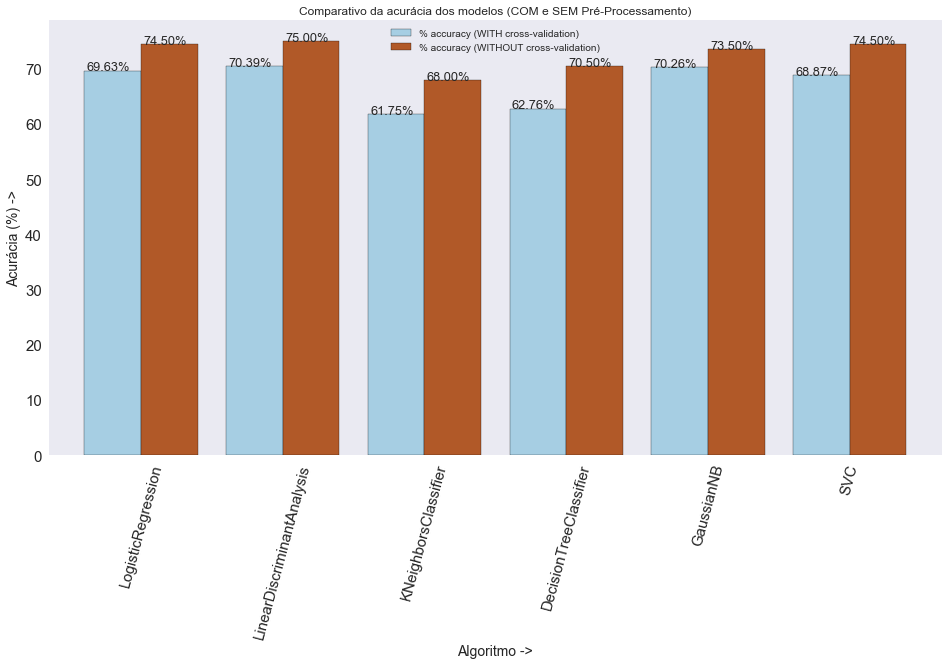

In [874]:
ax = datafram_comp[['% accuracy (WITH cross-validation)', '% accuracy (WITHOUT cross-validation)']].plot(kind='bar', width=0.8, edgecolor='black', colormap='Paired', figsize=(16, 8), legend=True, fontsize=15, grid=False, title ='Comparativo da acurácia dos modelos (COM e SEM Pré-Processamento)')
ax.set_xlabel("Algoritmo ->", fontsize=14)
ax.set_ylabel("Acurácia (%) ->", fontsize=14)

# Definir posição e labels no eixo X
xtickNames = plt.setp(ax, xticklabels=algoritmos)
plt.setp(xtickNames, rotation=75, fontsize=15)

x_offset = -0.03
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:0.2f}%".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=12.8, horizontalalignment='center')

plt.show()

### 8. Tuning dos Modelos
Antes da otimização, efetua-se tarefas de tratamento de dados, tais como:
- PADRONIZAÇÃO -> StandardScaler()
- ESCALA dos dados -> MinMaxScaler()
- NORMALIZAÇÃO -> Normalizer()
- BINARIZAÇÃO -> Binarizer()

Após, aplica-se algumas técnicas para otimização da acurácia dos modelos selecionados:
- Testando diferentes combinações de valores de parâmetro -> GridSearchCV()
- Métodos Ensemble

#### 8.1. Modelos com melhor performance: Gaussian Naive Bayes e LinearDiscriminantAnalysis

##### 8.1.1. Gaussian Naive Bayes

In [875]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Seta a data de início do processamento
start_time = time.time()

# criando o pipeline
pipelines = []
pipelines.append(('Standardize', StandardScaler()))
#pipelines.append(('ScaleFit', MinMaxScaler()))
#pipelines.append(('Normalizer', Normalizer()))
#pipelines.append(('Binarizer', Binarizer()))
pipelines.append(('GaussianNB', GaussianNB()))

print('\n')
print('Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE:', '\n')
print(pipelines, '\n')
# Ajustando os parâmetros:
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
#GaussianNB__ = 
#Binarizer__threshold = [2.5, 5.0, 7.5]

param_grid = dict(#GaussianNB__ = GaussianNB__
                  #,Binarizer__threshold = Binarizer__threshold
                 )

# Criando o modelo
modelo = Pipeline(steps=pipelines)

qtd_observacoes = len(preditoras_treino)
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
seed = 7     #"semente" = if int, is the seed used by the random number generator.

# Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
#k_fold = model_selection.KFold(n_splits = n_folds, random_state = seed)
k_fold = cross_validation.KFold(n = qtd_observacoes, n_folds = n_folds, random_state = seed)

# Testando diferentes combinações com os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = param_grid, cv = k_fold, scoring = 'accuracy')

grid_result = grid.fit(preditoras_treino, alvo_treino)

# Imprimindo o resultado
print("Melhor Acurácia: %.2f%% utilizando %s" % ((grid_result.best_score_ * 100), grid_result.best_params_))

# Seta o tempo despendido (em segundos) pelo processamento
elapsed_time_secs = time.time() - start_time
print('Tempo de execução: %s (HH:MM:SS)' % timedelta(seconds=round(elapsed_time_secs)))

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()



Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE: 

[('Standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('GaussianNB', GaussianNB(priors=None))] 

Melhor Acurácia: 70.25% utilizando {}
Tempo de execução: 0:00:00 (HH:MM:SS)


##### 8.1.2. LinearDiscriminantAnalysis

In [876]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Seta a data de início do processamento
start_time = time.time()

# criando o pipeline
pipelines = []
pipelines.append(('Standardize', StandardScaler()))
#pipelines.append(('ScaleFit', MinMaxScaler()))
#pipelines.append(('Normalizer', Normalizer()))
#pipelines.append(('Binarizer', Binarizer()))
pipelines.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))

print('\n')
print('Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE:', '\n')
print(pipelines, '\n')
# Ajustando os parâmetros:
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
LinearDiscriminantAnalysis__solver = ['svd', 'lsqr', 'eigen']
#Binarizer__threshold = 5.0

param_grid = dict(LinearDiscriminantAnalysis__solver = LinearDiscriminantAnalysis__solver
                 #,Binarizer__threshold = Binarizer__threshold
                 )

# Criando o modelo
modelo = Pipeline(steps=pipelines)

qtd_observacoes = len(preditoras_treino)
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
seed = 7     #"semente" = if int, is the seed used by the random number generator.

# Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
#k_fold = model_selection.KFold(n_splits = n_folds, random_state = seed)
k_fold = cross_validation.KFold(n = qtd_observacoes, n_folds = n_folds, random_state = seed)

# Testando diferentes combinações com os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = param_grid, cv = k_fold, scoring = 'accuracy')

grid_result = grid.fit(preditoras_treino, alvo_treino)

# Imprimindo o resultado
print("Melhor Acurácia: %.2f%% utilizando %s" % ((grid_result.best_score_ * 100), grid_result.best_params_))

# Seta o tempo despendido (em segundos) pelo processamento
elapsed_time_secs = time.time() - start_time
print('Tempo de execução: %s (HH:MM:SS)' % timedelta(seconds=round(elapsed_time_secs)))

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()



Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE: 

[('Standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))] 

Melhor Acurácia: 70.38% utilizando {'LinearDiscriminantAnalysis__solver': 'svd'}
Tempo de execução: 0:00:00 (HH:MM:SS)


##### 8.1.3. KNeighborsClassifier

In [878]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Seta a data de início do processamento
start_time = time.time()

# criando o pipeline
pipelines = []
pipelines.append(('Standardize', StandardScaler()))
#pipelines.append(('ScaleFit', MinMaxScaler()))
#pipelines.append(('Normalizer', Normalizer()))
#pipelines.append(('Binarizer', Binarizer()))
pipelines.append(('KNeighborsClassifier', KNeighborsClassifier()))

print('\n')
print('Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE:', '\n')
print(pipelines, '\n')
# Ajustando os parâmetros:
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
KNeighborsClassifier__n_neighbors = np.arange(1, 50, 2)
KNeighborsClassifier__algorithm =  ['auto', 'ball_tree', 'kd_tree', 'brute']
KNeighborsClassifier__metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
KNeighborsClassifier__weights = ['uniform', 'distance']
KNeighborsClassifier__n_jobs = [-1]
#Binarizer__threshold = [2.5, 5.0, 7.5]

param_grid = dict(KNeighborsClassifier__n_neighbors = KNeighborsClassifier__n_neighbors,
                  #KNeighborsClassifier__algorithm = KNeighborsClassifier__algorithm,
                  #KNeighborsClassifier__metric = KNeighborsClassifier__metric,
                  #KNeighborsClassifier__weights = KNeighborsClassifier__weights,
                  KNeighborsClassifier__n_jobs = KNeighborsClassifier__n_jobs
                  #,Binarizer__threshold = Binarizer__threshold
                 )

# Criando o modelo
modelo = Pipeline(steps=pipelines)

qtd_observacoes = len(preditoras_treino)
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
seed = 7     #"semente" = if int, is the seed used by the random number generator.

# Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
#k_fold = model_selection.KFold(n_splits = n_folds, random_state = seed)
k_fold = cross_validation.KFold(n = qtd_observacoes, n_folds = n_folds, random_state = seed)

# Testando diferentes combinações com os parâmetros
grid = GridSearchCV(estimator = modelo, param_grid = param_grid, cv = k_fold, scoring = 'accuracy')

grid_result = grid.fit(preditoras_treino, alvo_treino)

# Imprimindo o resultado
print("Melhor Acurácia: %.2f%% utilizando %s" % ((grid_result.best_score_ * 100), grid_result.best_params_))

# Seta o tempo despendido (em segundos) pelo processamento
elapsed_time_secs = time.time() - start_time
print('Tempo de execução: %s (HH:MM:SS)' % timedelta(seconds=round(elapsed_time_secs)))

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()



Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE: 

[('Standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNeighborsClassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))] 

Melhor Acurácia: 69.62% utilizando {'KNeighborsClassifier__n_jobs': -1, 'KNeighborsClassifier__n_neighbors': 41}
Tempo de execução: 0:00:43 (HH:MM:SS)


#### 8.2. Métodos ENSEMBLE
Visão otimizar o modelo preditivo. Principais modelos:

- BAGGING - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de de diferentes subsets no dataset de treino (exemplo de uso: RandomForest e Extra Trees).

- BOOSTING - Temos um conjunto de modelos do mesmo tipo, onde a saída de um modelo gera um erro. Esse erro é usado para o aprendizado do modelo sucessor, que também irá gerar um erro, que também será usado para o aprendizado do próximo modelo, e assim sucessivamente (exemplo de uso: AdaBoost e Gradient Boosting).

- VOTING - Para construção de múltiplos modelos (normalmente do tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões.

In [968]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Seta a data de início do processamento
start_time = time.time()

############################# cria-se os estimadores para o ensemble VotingClassifier #############################
# Criando os sub-modelos e colocando em uma lista. Após, estes serão passados para o VOTING
estimators = []

#Criação do modelo de LogisticRegression()
model_01 = LogisticRegression()
estimators.append(('LogisticRegression', model_01)) #model_01 sendo inserido na lista "estimators"

#Criação do modelo de DecisionTreeClassifier()
model_02 = DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier', model_02)) #model_02 sendo inserido na lista "estimators"

#Criação do modelo de SVC()
model_03 = SVC()
estimators.append(('SVM', model_03)) #model_03 sendo inserido na lista "estimators"

#Criação do modelo de KNeighborsClassifier()
model_04 = KNeighborsClassifier()
estimators.append(('KNeighborsClassifier', model_04)) #model_04 sendo inserido na lista "estimators"

#Criação do modelo de KNeighborsClassifier()
model_05 = LinearDiscriminantAnalysis()
estimators.append(('LinearDiscriminantAnalysis', model_05)) #model_05 sendo inserido na lista "estimators"

#Criação do modelo de KNeighborsClassifier()
model_06 = GaussianNB()
estimators.append(('GaussianNB', model_06)) #model_06 sendo inserido na lista "estimators"
####################################################################################################################

# criando o pipeline
pipelines = []
pipelines.append(('Standardize', StandardScaler()))
#pipelines.append(('ScaleFit', MinMaxScaler()))
#pipelines.append(('Normalizer', Normalizer()))
#pipelines.append(('Binarizer', Binarizer()))
ensembles = []
ensembles.append(('AdaBoostClassifier', AdaBoostClassifier()))
ensembles.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
ensembles.append(('RandomForestClassifier', RandomForestClassifier()))
ensembles.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
ensembles.append(('VotingClassifier', VotingClassifier(estimators)))
resultados = []
modelos_nome = []

print('\n')
print('Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE:', '\n')
print(pipelines, '\n')
# Ajustando os parâmetros:
# Faremos diferenets combinações desses métodos, a fim de verificar qual é a melhor combinação.
#Binarizer__threshold = 5.0

# Criando o modelo
pipe = Pipeline(steps=pipelines)
for nome, preprocess in pipelines:
    if nome == 'Standardize':
        preditoras_preprocessed = (preprocess.fit(preditoras_treino)).transform(preditoras_treino)
        if nome == 'Normalizer':
            preditoras_preprocessed = (preprocess.fit(preditoras_preprocessed)).transform(preditoras_preprocessed)
    elif nome == 'Normalizer':
        preditoras_preprocessed = (preprocess.fit(preditoras_treino)).transform(preditoras_treino)
        if nome == 'Standardize':
            preditoras_preprocessed = (preprocess.fit(preditoras_preprocessed)).transform(preditoras_preprocessed)

qtd_observacoes = len(preditoras_treino)
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
seed = 7     #"semente" = if int, is the seed used by the random number generator.

# Percorrendo cada um dos modelos
for nome, modelo in ensembles:
    # Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
    k_fold = cross_validation.KFold(n = qtd_observacoes, n_folds = n_folds, random_state = seed)
    result_saida = cross_validation.cross_val_score(modelo,
                                                    preditoras_preprocessed, #preditoras_treino foi pré-processada!
                                                    alvo_treino,
                                                    cv = kfold,
                                                    scoring = 'accuracy'
                                                    )

    #Colocando o NOME do modelo medido em uma lista.
    modelos_nome.append(nome)
    #Colocando o resultado da acurácia do modelo em uma lista. Scoring selecionado: "accuracy".
    resultados.append(result_saida * 100)
    #Saída para mensagem final
    print('MODELO: %s\nMÉDIA: %.2f%%\nDESVIO PADRDÃO: %.2f%%\n' % (nome, (result_saida.mean()*100), (result_saida.std()*100)))
    
# Seta o tempo despendido (em segundos) pelo processamento
elapsed_time_secs = time.time() - start_time
print('Tempo de execução: %s (HH:MM:SS)' % timedelta(seconds=round(elapsed_time_secs)))

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()



Modelos e valores DEFAULT dos parâmetros dos processos do PIPELINE: 

[('Standardize', StandardScaler(copy=True, with_mean=True, with_std=True))] 

MODELO: AdaBoostClassifier
MÉDIA: 65.87%
DESVIO PADRDÃO: 4.05%

MODELO: GradientBoostingClassifier
MÉDIA: 68.80%
DESVIO PADRDÃO: 3.28%

MODELO: RandomForestClassifier
MÉDIA: 65.73%
DESVIO PADRDÃO: 4.73%

MODELO: ExtraTreesClassifier
MÉDIA: 61.07%
DESVIO PADRDÃO: 5.56%

MODELO: VotingClassifier
MÉDIA: 70.13%
DESVIO PADRDÃO: 2.99%

Tempo de execução: 0:00:02 (HH:MM:SS)


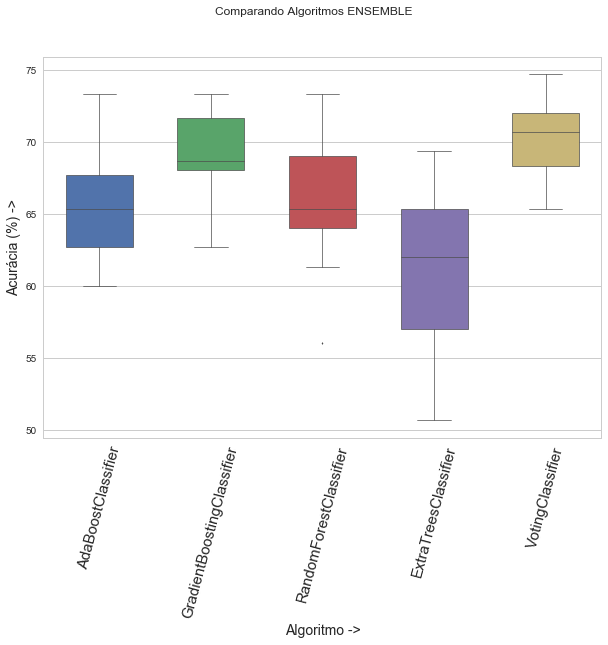

In [975]:
sns.set_style("whitegrid")

fig = plt.figure()
fig.suptitle('Comparando Algoritmos ENSEMBLE')
ax = fig.add_subplot(111)
ax.set_xlabel("Algoritmo ->", fontsize=14)
ax.set_ylabel("Acurácia (%) ->", fontsize=14)
# the size of A4 paper
fig.set_size_inches(10, 7)
boxplot = sns.boxplot(data=resultados, orient = "v", width=0.6, fliersize=2, linewidth=0.7, saturation=0.9, ax=ax)
xtickNames = plt.setp(ax, xticklabels=modelos_nome)
plt.setp(xtickNames, rotation=75, fontsize=15)

plt.show()

### 9. Modelo Final

#### 9.1. Avaliação final do modelo
Considerando que o modelo "vencedor" foi o LinearDiscriminantAnalysis.

In [44]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()
###########################################################################################

# Preparando a versão final do modelo
preditoras_treino_preprocessed = (StandardScaler().fit(preditoras_treino)).transform(preditoras_treino)
modelo = LinearDiscriminantAnalysis(solver = 'svd')
modelo.fit(preditoras_treino_preprocessed, alvo_treino)
print('Modelo treinado:\n')
print(modelo)
###########################################################################################
# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()

Modelo treinado:

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


In [69]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()

# Seta a data de início do processamento
start_time = time.time()
###########################################################################################
# Aplicando o modelo aos dados de teste
preditoras_teste_preprocessed = (StandardScaler().fit(preditoras_treino)).transform(preditoras_teste)
previsoes = modelo.predict(preditoras_teste_preprocessed)

print('-> Acurácia do Modelo:', str(round((accuracy_score(alvo_teste, previsoes)*100),2)) + '%')
print('\n-> Matriz de Confusão:\n', confusion_matrix(alvo_teste, previsoes), '\n')
print('-> Relatório Final:\n\n', classification_report(alvo_teste, previsoes))
###########################################################################################
# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()

-> Acurácia do Modelo: 75.0%

-> Matriz de Confusão:
 [[  9  42]
 [  8 141]] 

-> Relatório Final:

              precision    recall  f1-score   support

          0       0.53      0.18      0.26        51
          1       0.77      0.95      0.85       149

avg / total       0.71      0.75      0.70       200



#### 9.2. Salvando os binários do modelo final em uma pasta

In [189]:
###########################################################################################
# biblioteca para manipulação de datas e tempo
###########################################################################################
import time as time
from datetime import timedelta

# bibliotecas de PRÉ-PROCESSAMENTO
from sklearn.preprocessing import StandardScaler # normaliza a distribuição dos dados gerando uma dist. Gaussiana (normal)

# bibliotecas de MACHINE LEARNING
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# biblioteca de MANIPULAÇÃO DE DATAFRAMES
from pandas import read_csv
from pandas import DataFrame

# biblioteca de MANIPULAÇÃO DE ARRAYS E MATRIZES (N-DIMENSIONAIS)
import numpy as np

# desabilitando mensagens de warnings
from sklearn.exceptions import DataConversionWarning
import warnings

# bibliotecas para geração e carregamento, respectivamente, dos binários do modelo gerado
import pickle
import dill
from sklearn.externals import joblib

###########################################################################################
# Carregando os dados
###########################################################################################
url = "C:\\CreditCard.csv" # Windows
#url = '/home/daniellj/Desktop/CreditCard.csv' # Linux
colunas = ['StatusContaCorrente_DM', 'DuracaoEmprestimoMeses', 'HistoricoCredito', 'Objetivo', 'CreditoDisponivel_DM', 'ReservaDinheiroCliente_DM', 'QtdMesesAtualEmprego', 'TaxaJurosEmprestimo', 'GeneroEEstadoCivil', 'Fiador', 'QtdMesesAtualMoradia', 'Bens', 'QtdMesesContaCorrente', 'OutrosParcelamentos', 'Residencia', 'QtdCreditosComBancoSolicitado', 'Ocupacao', 'QtdPessoasDependentes', 'Telefone', 'TrabalhadorEstrangeiro', 'Classe']
dados = read_csv(filepath_or_buffer=url, names=colunas, delimiter=',')

###########################################################################################
# Adicionando CLASSE numérica no DATASET
###########################################################################################
dados['ClasseNumerica'] = np.where(dados['Classe']=='good', 1, 0)

###########################################################################################
# Separando variáveis INDEPENDETES (preditoras) de DEPENDENTES (previsoras)
###########################################################################################
ColunaNumericas = (dados._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtColunasNumericas = len(ColunaNumericas)-1 #contando a quantidade de colunas (-1 pois o índice começa em ZERO)

# Criando datasets para variáveis preditoras e previsoras (técnica de SLICE)
preditoras = (dados[ColunaNumericas]).values[:,0:QtColunasNumericas] # index QtColunasNumericas é excludente no slice!
alvo = (dados[ColunaNumericas]).values[:,QtColunasNumericas] # QtColunasNumericas = index da última coluna = CLASSE

###########################################################################################
# Divisão do dados em TREINO e TESTE
###########################################################################################
#Definição do tamanho das amostras
test_size = 0.20 # % destinado para TESTE

#Garante que os resultados podem ser reproduzidos
#Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 #"semente" = if int, is the seed used by the random number generator.

# Conjuntos de dados de treino e de teste
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = model_selection.train_test_split(
                                                                     preditoras
                                                                    ,alvo
                                                                    ,test_size = test_size
                                                                    ,random_state = seed #semente
                                                                    )

# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()
###########################################################################################

# Preparando a versão final do modelo
preditoras_treino_preprocessed = (StandardScaler().fit(preditoras_treino)).transform(preditoras_treino)
modelo = LinearDiscriminantAnalysis(solver = 'svd')
modelo.fit(preditoras_treino_preprocessed, alvo_treino)

###########################################################################################

model_path = 'C:\\ML_API\\models\\'
filename = 'model_v1.pk'

with open(model_path + filename, 'wb') as file:
    pickle.dump(modelo, file)
    file.close()

### 10. Testando o Modelo Final com Dados Externos

In [179]:
# Local onde ficará alocado o arquivo de INPUT
file = 'C:\\ML_API\\file_to_prediction\\credit_analysis001.csv'
df = pd.read_csv(file, encoding="utf-8-sig", delimiter=';')
print('---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = DataFrame):\n')
df

---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = DataFrame):



,Identificacao,DuracaoEmprestimoMeses,CreditoDisponivel_DM,TaxaJurosEmprestimo,QtdMesesAtualMoradia,QtdMesesContaCorrente,QtdCreditosComBancoSolicitado,QtdPessoasDependentes
0,Pedro Goulart,16,1000,3,5,4,2,0
1,Everton Barbosa,6,1169,4,4,67,2,1
2,Viviane Bastos,24,2500,2,0,41,1,0
3,Luiz Garcia,120,25000,2,2,14,1,1
4,Vinicius Manoel,24,4870,3,4,53,2,2
5,Amanda Roberti,12,2096,2,3,49,1,2


In [180]:
# Converte dados do Pandas para formato JSON
data = df.to_json(orient='records')

print('---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = JSON):\n')
data

---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = JSON):



'[{"Identificacao":"Pedro Goulart","DuracaoEmprestimoMeses":16,"CreditoDisponivel_DM":1000,"TaxaJurosEmprestimo":3,"QtdMesesAtualMoradia":5,"QtdMesesContaCorrente":4,"QtdCreditosComBancoSolicitado":2,"QtdPessoasDependentes":0},{"Identificacao":"Everton Barbosa","DuracaoEmprestimoMeses":6,"CreditoDisponivel_DM":1169,"TaxaJurosEmprestimo":4,"QtdMesesAtualMoradia":4,"QtdMesesContaCorrente":67,"QtdCreditosComBancoSolicitado":2,"QtdPessoasDependentes":1},{"Identificacao":"Viviane Bastos","DuracaoEmprestimoMeses":24,"CreditoDisponivel_DM":2500,"TaxaJurosEmprestimo":2,"QtdMesesAtualMoradia":0,"QtdMesesContaCorrente":41,"QtdCreditosComBancoSolicitado":1,"QtdPessoasDependentes":0},{"Identificacao":"Luiz Garcia","DuracaoEmprestimoMeses":120,"CreditoDisponivel_DM":25000,"TaxaJurosEmprestimo":2,"QtdMesesAtualMoradia":2,"QtdMesesContaCorrente":14,"QtdCreditosComBancoSolicitado":1,"QtdPessoasDependentes":1},{"Identificacao":"Vinicius Manoel","DuracaoEmprestimoMeses":24,"CreditoDisponivel_DM":4870,"T

In [192]:
import json

#Transformando arquivo no formato JSON para LISTA
values = json.loads(data)

# Transforma os valores em DataFrame de INPUT
input_data = pd.DataFrame(values)

# Separando as colunas nominais e preditoras
colunas_nominais = ['Identificacao']
colunas_preditoras = ['DuracaoEmprestimoMeses', 'CreditoDisponivel_DM', 'TaxaJurosEmprestimo', 'QtdMesesAtualMoradia', 'QtdMesesContaCorrente', 'QtdCreditosComBancoSolicitado', 'QtdPessoasDependentes']

ids = np.array(input_data[colunas_nominais].astype(dtype='str'))
test = (np.array(input_data[colunas_preditoras]))

print("Loading the model...")
loaded_model = None

model_path = 'C:\\ML_API\\models\\'
filename = 'model_v1.pk'

# Carregando o modelo
with open(model_path + filename, 'rb') as f:
    loaded_model = dill.load(f)
    f.close()

print(type(loaded_model))
print("\nThe model has been loaded...doing predictions now...")
predictions = loaded_model.predict(test)

# Fazendo a "tradução" dos resultados da classificação da CLASSE
prediction_series = np.where(pd.Series(predictions)==1, 'Good Payer!', 'Bad Payer!')

"""
Adicionando as predições a uma série Pandas, para posteriormente fazer a junção com a lista de Ids (nomes dos clientes),
para identificar a predição para cada um dos clientes
"""

#Fazendo a junção das predições + Ids
prediction_columns = ['Id', 'Class']
final_predictions = pd.DataFrame(list(zip(ids, prediction_series)), columns=prediction_columns)

print('\nPrediction results:')
final_predictions

Loading the model...
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>

The model has been loaded...doing predictions now...

Prediction results:


,Id,Class
0,[Pedro Goulart],Bad Payer!
1,[Everton Barbosa],Bad Payer!
2,[Viviane Bastos],Bad Payer!
3,[Luiz Garcia],Bad Payer!
4,[Vinicius Manoel],Bad Payer!
5,[Amanda Roberti],Bad Payer!
